In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

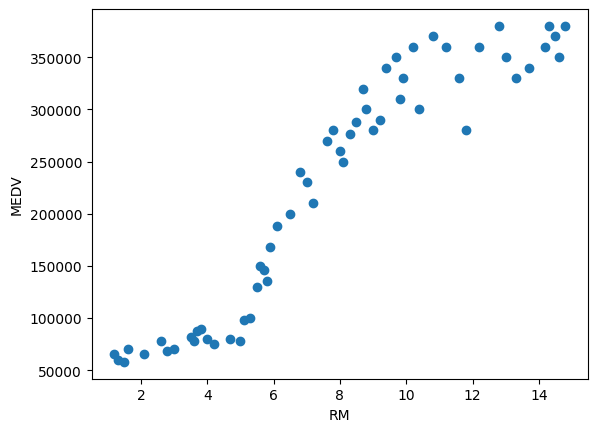

In [2]:
dataset = pd.read_csv("data/linear_regression_dataset_sample.csv")
X = dataset.iloc[:, 1].values.reshape(-1,1) # 房間數
y = dataset.iloc[:,2].values # 房價

plt.scatter(X, y) # 繪製散佈圖
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
X_train.shape, X_test.shape

((40, 1), (18, 1))

In [4]:
regressor = make_pipeline(PolynomialFeatures(6), LinearRegression()) # 多項式迴歸, degree=6
regressor.fit(X_train, y_train) # 訓練模型


,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,6
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [5]:
score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.9701140559069571
Accuracy: 97.01140559069572%


In [6]:
y1 = regressor.predict([[5.3],[11.2],[14.3]]) # 預測
print('Predict : ', y1)

Predict :  [120506.10466009 331699.3690431  367807.58456399]


In [7]:
y_pred = regressor.predict(X_test) # 預測
print('Predict : ', y_pred)

Predict :  [ 45109.52240972  80396.86470649 304864.22313794  81242.15410358
 331872.63267822 357510.97793711 318291.11951277 209693.07854612
 331783.54961074  77891.55041799 334107.14006756  70918.3050338
 313562.26255169 281650.45476693  74553.59427521 120506.10466009
  78650.39709959  81681.14021161]


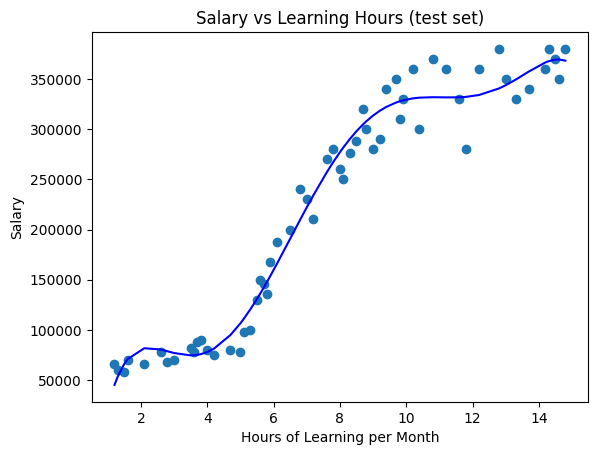

In [8]:
plt.scatter(X,y) # 繪製散佈圖
plt.plot(X, regressor.predict(X), color = 'blue') # 繪製迴歸線
plt.title('Salary vs Learning Hours (test set)') # 標題
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()